# Individual Project - Adam Wilczyński

based on Problem set #1

Main idea: I would like to check how the specific policy that could permanently lower an unemployment may affect asset decisions of agents and distribution of wealth in the ecomony. 

An inspiration could be an accession to European Union of such countries as Poland and Slovakia that before the accession (1990-2004) had unemployment rate up to 20% and no lower than 10% (See Pictures 1 and 2 below). After the accession took place, the unemployment permanently decreasesd, and during financial crisis (2008) and subsequent debt crisis in euro zone (2012) unemployment accounted for about 10% and 15% (respectively in Poland and Slovakia). During the post crisis boom an unmeployment dropped to ~5% approximetely for both countries.

Picture 1. (unemployment rate - seasonally adjusted, not calendar adjusted):
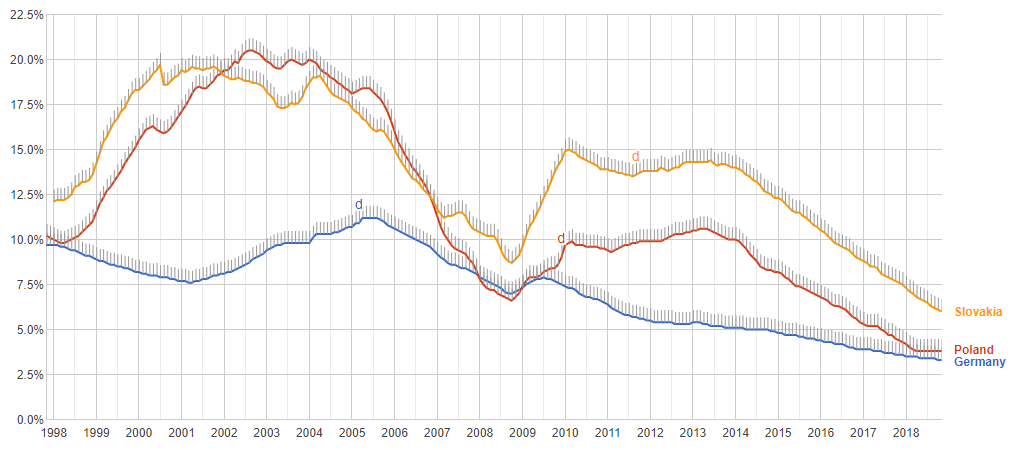
<center> Source: https://www.google.com/publicdata/explore?ds=z8o7pt6rd5uqa6_&met_y=unemployment_rate&hl=en&dl=en </center>


Picture 2. (unemployment in Poland - longer interval):
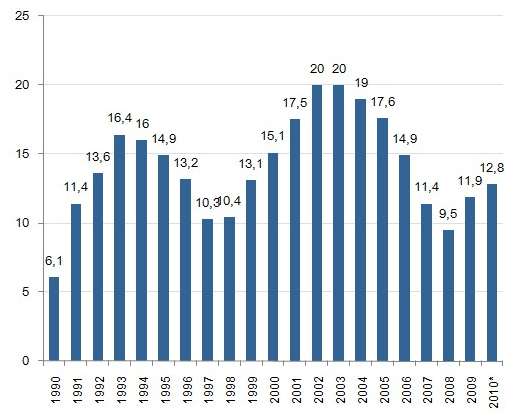
<center> Source: https://rynekpracy.pl/monitory/bezrobocie-1990-2010 </center>

I decided to represent the similar structural change by spliting the sample of the model in two periods. Periods from 1 to 50 with high unemployment (about 10% in good time and 20% in bad time) and periods from 51 to 100 with low unemployment (from 5% to 10% respectively in good and bad time)


In order to calibrate the algorithm used in Problem set #1 I changed the transition matrix manually. The two new matrices resulted in the following unemployment rate in the model:

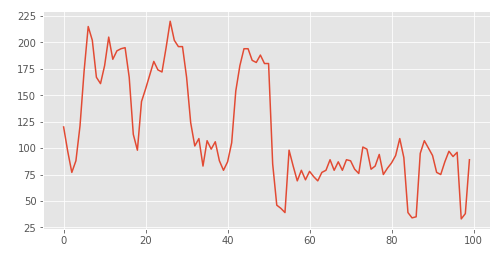
<center> Source: code in the appendix </center>

There are 100 periods in total. 50 before policy implementation (accession to the EU) and 50 after.
In the second half there is much more "bad time" occurences. This can be explained as a lucky coincidence because from 2004 to 2018 there were two financial crises that could be recognised as "bad time" and only years 2015-2018 are purely can be considered as "good time". Anyway, the expected duration of bad and good time is equal. The probability of continuation of trend is 7 times higher than probability of changing the trend.


How will this structural change affect the distribution of capital and decision policy of agents? The picture below represents the distribution of wealth in period #50 (the last period before the structural change) and in period #100 (the last one). 

Wealth distributions:
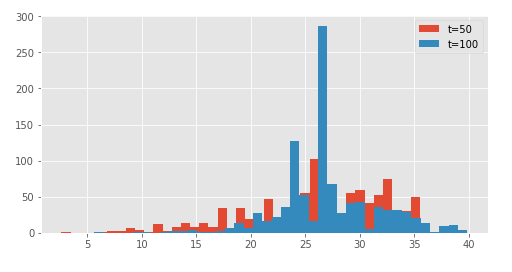
<center> Source: code in the appendix </center>

The interesting fact is that there is much smaller inequality in the last period than in the period #50, although all agents started with the same wealth at the beginning (about 20 units).

There can be two possible explanations of the samller inequality:

1. There is less very rich agents because after the policy implementation employed workers in good time (rich) saved optimally less than before the policy implementation. Following two charts demonstrate the optimal asset decision with respect to current wealth of agent.

    BEFORE they saved up to ~57 units of wealth:
    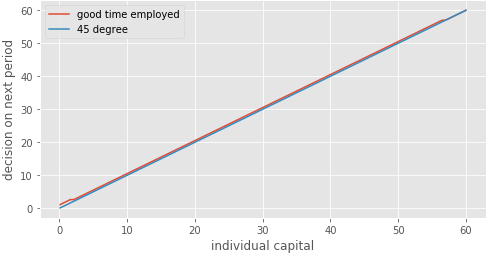
    <center> Source: code in the appendix </center>

    AFTER they save up to about 52 unitas :
    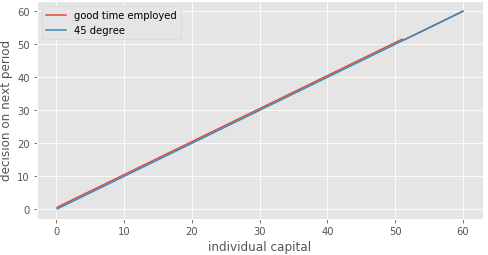
    <center> Source: code in the appendix </center>
    
    Possible explanation of this phenomenom could be the fact that after structural change they do not care about precautionary saving since the risk of being unemployed is much lower.

2. There is less very poor agents because there is less long-term unemployed who decumulate their capital until they bancrupt.

Summing up, structural change that permanently lowered the unemployment level resulted in smaller inequality.


# Appendix

## Algorithm for the first 50 peridos (before policy implementation)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import random

In [2]:
piZ = [ [7/8, 1/8], 
       [1/8, 7/8] ] # because average duration of both good and bad times is eight quarters

#the matrix below will guarantee that unemployment in bad time is about 20% and unemployment in good time about 10%
pi_vec = [0.31166667,0.055,0.01125,0.02267593,0.56333333,0.82,0.11375,0.10232407,0.11375,0.00682292,0.575,0.07,0.01125,0.11817708,0.3,0.805]
pize = np.reshape(pi_vec,[4,4], order = 'F')

# Parameters
betta=0.95
delta=0.0025
z=[1.01, 0.99]
alfa=0.36
L=[0.96, 0.9]

# $$$$$$$$$$$$$$$$$$ Starting values for V $$$$$$$$$$$$$$$$$$$$$$$    
##### Starting values for V
def v1g(k,K):
    return np.log(alfa*z[0]*(K/L[0])**(alfa-1)*k + (1-alfa)*z[0]*(K/L[0])**(alfa)-delta*k)/(1-betta) # c+k' session 2  
def v1b(k,K):
    return np.log(alfa*z[1]*(K/L[1])**(alfa-1)*k + (1-alfa)*z[1]*(K/L[1])**(alfa)-delta*k)/(1-betta) # c+k' session 2  
def v0g(k,K):
    return np.log(alfa*z[0]*(K/L[0])**(alfa-1)*k -delta*k)/(1-betta) # c+k' session 2  
def v0b(k,K):
    return np.log(alfa*z[1]*(K/L[1])**(alfa-1)*k -delta*k)/(1-betta) # c+k' session 2

# $$$$$$$$$$$$$$$$$$ grids $$$$$$$$$$$$$$$$$$$$$$$  
##### Grids 
# Individual capital
k_grid = np.linspace(0.1,60,120)
# Aggregate capital
x=1
i = 0
K_grid=[]
while x==1:
    K_grid.append(round(16+i*0.15, 2))
    i = i+1
    if 16+i*0.15 >= 45:
        x = 0
        
# $$$$$$$$ Evaluation of the VF
##### Evaluation of the VF
#initialize variables
V1g = [0]*len(k_grid)
V1b = [0]*len(k_grid)
V0g = [0]*len(k_grid)
V0b = [0]*len(k_grid)
V1gt = [0]*len(k_grid)
V1bt = [0]*len(k_grid)
V0gt = [0]*len(k_grid)
V0bt = [0]*len(k_grid)

for i in range(len(k_grid)):
    V1g[i] = [0]*len(K_grid)
    V1b[i] = [0]*len(K_grid)
    V0g[i] = [0]*len(K_grid)
    V0b[i] = [0]*len(K_grid)
    V1gt[i] = [0]*len(K_grid)
    V1bt[i] = [0]*len(K_grid)
    V0gt[i] = [0]*len(K_grid)
    V0bt[i] = [0]*len(K_grid)     

for i in range(len(k_grid)):
    for j in range(len(K_grid)):
        V1g[i][j]= v1g(k_grid[i],K_grid[j])
        V1b[i][j]= v1b(k_grid[i],K_grid[j])
        V0g[i][j]= v0g(k_grid[i],K_grid[j])
        V0b[i][j]= v0b(k_grid[i],K_grid[j])
        
##### Evaluation of the VF
#initialize variables
V1g2 = [0]*len(k_grid)
V1b2 = [0]*len(k_grid)
V0g2 = [0]*len(k_grid)
V0b2 = [0]*len(k_grid)
V1gt2 = [0]*len(k_grid)
V1bt2 = [0]*len(k_grid)
V0gt2 = [0]*len(k_grid)
V0bt2 = [0]*len(k_grid)

for i in range(len(k_grid)):
    V1g2[i] = [0]*len(K_grid)
    V1b2[i] = [0]*len(K_grid)
    V0g2[i] = [0]*len(K_grid)
    V0b2[i] = [0]*len(K_grid)
    V1gt2[i] = [0]*len(K_grid)
    V1bt2[i] = [0]*len(K_grid)
    V0gt2[i] = [0]*len(K_grid)
    V0bt2[i] = [0]*len(K_grid)     

for i in range(len(k_grid)):
    for j in range(len(K_grid)):
        V1g2[i][j]= v1g(k_grid[i],K_grid[j])
        V1b2[i][j]= v1b(k_grid[i],K_grid[j])
        V0g2[i][j]= v0g(k_grid[i],K_grid[j])
        V0b2[i][j]= v0b(k_grid[i],K_grid[j])

##### Perceived law of motion  
# initial values 
b0g=0
b1g=1
b0b=0
b1b=1

iter_b = 1
BREAK = 0
while iter_b<15 and BREAK ==0:
    # zi is the index for good shock 
    def H(K,zi):
        return np.exp( (b0g+b1g*np.log(K))*zi+ (b0b+b1b*np.log(K))*(1-zi))
    
    # $$$$$$$$$$$$ Solution of the consumer problem    
    # Consumption for each possible decision    
    # e=0 unemployed =1 employed
    # g=0 good times  =1 bad times   
    #consumption
    def c(i,I,e,g):
        vec = np.dot(alfa*z[g]*(K_grid[I]/L[g])**(alfa-1),k_grid)+(1-alfa)*z[g]*(K_grid[I]/L[g])**(alfa)*e+(1-delta)*k_grid[i]- k_grid
        for i in range(len(vec)):
            if vec[i]<0:
                vec[i]=0
        return(vec)    
    
    def column(matrix, i):
        return [row[i] for row in matrix]
    
    iter = 1
    STOP = 0
    while iter < 15 and STOP == 0:
        i=0
        for i in range(len(k_grid)):
            I = 0
            for I in range(len(K_grid)):
                values = abs(K_grid-H(K_grid[I],1))
                Ip= np.argmin(values)
                V0gt[i][I] = max(np.log(c(i,I,0,0)) + betta*(np.matmul(pize[0],[column(V0g, Ip), column(V1g, Ip), column(V0b,Ip), column(V1b,Ip)])))
                V1gt[i][I] = max(np.log(c(i,I,1,0)) + betta*(np.matmul(pize[1],[column(V0g, Ip), column(V1g, Ip), column(V0b,Ip), column(V1b,Ip)])))
                 
                values = abs(K_grid-H(K_grid[I],0))
                Ip= np.argmin(values)
                V0bt[i][I] = max(np.log(c(i,I,0,1)) + betta*(np.matmul(pize[2],[column(V0g, Ip), column(V1g, Ip), column(V0b,Ip), column(V1b,Ip)])))
                V1bt[i][I] = np.nanmax(np.log(c(i,I,1,1)) + betta*(np.matmul(pize[3],[column(V0g, Ip), column(V1g, Ip), column(V0b,Ip), column(V1b,Ip)])))
        
        temp=np.array([abs(np.array(V0gt)-np.array(V0g)),abs(np.array(V1gt)-np.array(V1g)),abs(np.array(V0bt)-np.array(V0b)),abs(np.array(V1bt)-np.array(V1b))])
        dev = temp.max()        
              
        for i in range(len(k_grid)):
            for j in range(len(K_grid)):
                V0g[i][j]=V0gt[i][j]
                V1g[i][j]=V1gt[i][j]
                V0b[i][j]=V0bt[i][j]
                V1b[i][j]=V1bt[i][j]      
                
        for i in range(len(k_grid)):
            for j in range(len(K_grid)):
                V0g2[i][j]=V0gt2[i][j]
                V1g2[i][j]=V1gt2[i][j]
                V0b2[i][j]=V0bt2[i][j]
                V1b2[i][j]=V1bt2[i][j]  
        
        if dev<0.1:
            STOP = 1

        iter = iter + 1
      
    #recover policy function
    a = [0]*len(k_grid)
    for i in range(len(k_grid)):
        a[i]=[0]*len(K_grid)
        for I in range(len(K_grid)):
            a[i][I]=[0]*2
            for x in range(2):
                a[i][I][x] = [0]*2                
                
    for i in range(len(k_grid)):
        for I in range(len(K_grid)):
            values = abs(K_grid-H(K_grid[I],1))
            Ip= np.argmin(values)           
            #0g
            a[i][I][1][0] = np.argmax(np.log(c(i,I,0,0)) + betta*(np.matmul(pize[0],[column(V0g, Ip), column(V1g, Ip), column(V0b,Ip), column(V1b,Ip)])))
            #1g
            a[i][I][0][0] = np.argmax(np.log(c(i,I,1,0)) + betta*(np.matmul(pize[1],[column(V0g, Ip), column(V1g, Ip), column(V0b,Ip), column(V1b,Ip)])))
            
            values = abs(K_grid-H(K_grid[I],0))
            Ip= np.argmin(values)
            #0b
            a[i][I][1][1] = np.argmax(np.log(c(i,I,0,1)) + betta*(np.matmul(pize[2],[column(V0g, Ip), column(V1g, Ip), column(V0b,Ip), column(V1b,Ip)])))
            #1b
            a[i][I][0][1] = np.argmax(np.log(c(i,I,1,1)) + betta*(np.matmul(pize[3],[column(V0g, Ip), column(V1g, Ip), column(V0b,Ip), column(V1b,Ip)])))
    
    ar = np.array(a)
  
    ########## Simulation    
    # A sequence of TFP
    # using the index =0 good ,  =1 bad
    
    if iter_b==1:
        zt = [0]*50          
        zt[0]=0            
        for t in range(1,50):
            draw=random.randint(0,100)/100
            zt[t]= int(draw>=piZ[zt[t-1]][0])
                
        # Splitting the sample for good and bad times       
        i_zg = []
        i_zb = []      
        for t in range(len(zt)):
            if zt[t]==0:
                i_zg.append(t) # index good times 
            else:
                i_zb.append(t) # index bad times           
                
        # initial distribution of assets and employment    
        N_state = [40]*1000
        for i in range(len(N_state)):
            N_state[i] = [0]*2
            for j in range(2):
                N_state[i][j] = [0]*50
        
        for i in range(len(N_state)):
            if i <880: #initial unemployment 12%
                for j in range(2):
                    N_state[i][j][0] = (1-j)*40+j*0
            else:
                for j in range(2):
                    N_state[i][j][0] = (1-j)*40+j*1
        
        N_state = np.array(N_state)
        
        # Storage of the sequence of aggregate capital    
        K_ind = [0]*50
        K_ind[0]=3
        for t in range(1,50):
            temp_sum = 0
            for n in range(1000):
                # Evolution of assets
                N_state[n][0][t]=a[N_state[n][0][t-1]][K_ind[t-1]][N_state[n][1][t-1]][zt[t-1]]
                # Evolution of the employment status     
                if zt[t-1]==0 and zt[t]==0 and N_state[n][1][t-1]==0: #gg0
                    N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[1][0]/piZ[0][0])    
                if zt[t-1]==0 and zt[t]==1 and N_state[n][1][t-1]==0: #gb0
                    N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[1][2]/piZ[0][1])
                if zt[t-1]==1 and zt[t]==0 and N_state[n][1][t-1]==0: #bg0
                    N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[3][0]/piZ[1][0])
                if zt[t-1]==1 and zt[t]==1 and N_state[n][1][t-1]==0: #bb0
                    N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[3][2]/piZ[1][1])
                if zt[t-1]==0 and zt[t]==0 and N_state[n][1][t-1]==1: #gg1
                    N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[0][0]/piZ[0][0])
                if zt[t-1]==0 and zt[t]==1 and N_state[n][1][t-1]==1: #gb1
                    N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[0][2]/piZ[0][1])
                if zt[t-1]==1 and zt[t]==0 and N_state[n][1][t-1]==1: #bg1
                    N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[2][0]/piZ[1][0])
                if zt[t-1]==1 and zt[t]==1 and N_state[n][1][t-1]==1: #bb1
                    N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[2][2]/piZ[1][1])
                temp_sum = temp_sum + N_state[n][0][t]
            K_ind[t]=np.argmin(abs(k_grid[int(round(temp_sum/1000))]-K_grid))
    
    else:
        for t in range(1,50):
            temp_sum = 0
            for n in range(1000):
                # Evolution of assets
                N_state[n][0][t]=a[N_state[n][0][t-1]][K_ind[t-1]][N_state[n][1][t-1]][zt[t-1]]
                # Storage of the sequence of aggregate capital
                temp_sum = temp_sum + N_state[n][0][t]
            K_ind[t]=np.argmin(abs(k_grid[int(round(temp_sum/1000))]-K_grid))   
    
    ####save N_state    
    N_state_temp = [0]*1000
    for i in range(1000):
        N_state_temp[i]=[0]*2       
    for n in range(1000):
        N_state_temp[n][0]=N_state[n][0][49]
        N_state_temp[n][1]=N_state[n][1][49]       
    N_state_old = N_state
        
    #$$$$$$$$$$ Regression model for the evolution of aggregate capital  
    # regression for good times 
    Yg = [0]*len(i_zg)
    Xg = [0]*len(i_zg)
    for i in range(len(i_zg)):
        Xg[i] = [0]*2
        
    for i in range(20,len(i_zg)):
        Yg[i] = np.log(K_grid[K_ind[i_zg[i]-1]])
        for j in range(2):
            Xg[i][0] = 1
            Xg[i][1] = np.log(K_grid[K_ind[i_zg[i]-2]])
    
    Bg = np.linalg.lstsq(Xg,Yg)
    b0gp=Bg[0][0]
    b1gp=Bg[0][1]
    
    # regression for bad times
    Yb = [0]*len(i_zb)
    Xb = [0]*len(i_zb)
    for i in range(len(i_zb)):
        Xb[i] = [0]*2
        
    for i in range(len(i_zb)):
        Yb[i] = np.log(K_grid[K_ind[i_zb[i]-1]])
        for j in range(2):
            Xb[i][0] = 1
            Xb[i][1] = np.log(K_grid[K_ind[i_zb[i]-2]])
   
    Bb = np.linalg.lstsq(Xb,Yb)
    b0bp=Bb[0][0]
    b1bp=Bb[0][1]
    
    dev_b=max([abs(b0g-b0gp), abs(b1g-b1gp), abs(b0b-b0bp), abs(b1b-b1bp)])
    
    if dev_b<=0.01:
        BREAK = 1
    
    b0g=0.1*b0gp+0.9*b0g
    b1g=0.1*b1gp+0.9*b1g
    b0b=0.1*b0bp+0.9*b0b
    b1b=0.1*b1bp+0.9*b1b    
    iter_b = iter_b + 1

C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: RuntimeWarning: divide by zero encountered in log
C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:136: RuntimeWarning: divide by zero encountered in log
C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:140: RuntimeWarning: divide by zero encountered in log
C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:179: RuntimeWarning: divide by zero encountered in log
C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: divide by zero encountered in log
C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:186: RuntimeWarning: divide by zero encountered in log
C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:188: RuntimeWarning: divide by zero encountered in log
C:\Users\adamw\Anaconda3\lib\site-packag

### Asset policy

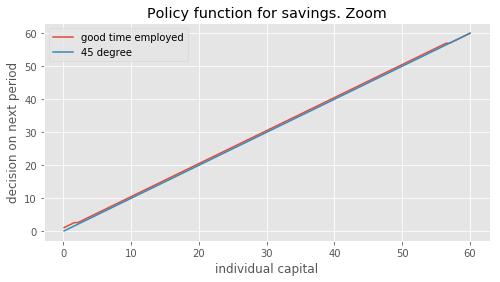

In [4]:
######################################
plt.plot(k_grid, k_grid[ar[:,24,0,0]], label='good time employed')
plt.plot(k_grid, k_grid, label='45 degree')
plt.legend() 
plt.xlabel('individual capital')
plt.ylabel('decision on next period')
plt.title('Policy function for savings. Zoom')
plt.rcParams["figure.figsize"] = (8,4)
#plt.xlim([0,5]) 
#plt.ylim([0,5])
######################################

(0, 5)

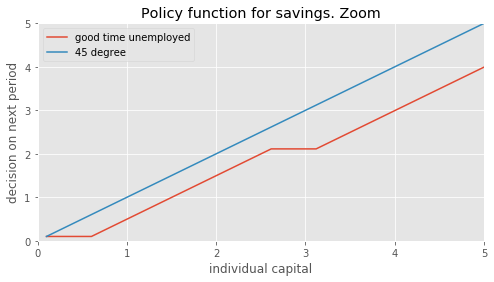

In [5]:
plt.plot(k_grid, k_grid[ar[:,22,1,0]], label='good time unemployed')
plt.plot(k_grid, k_grid, label='45 degree')
plt.legend() 
plt.xlabel('individual capital')
plt.ylabel('decision on next period')
plt.title('Policy function for savings. Zoom')
plt.rcParams["figure.figsize"] = (8,4)
plt.xlim([0,5]) 
plt.ylim([0,5])
######################################

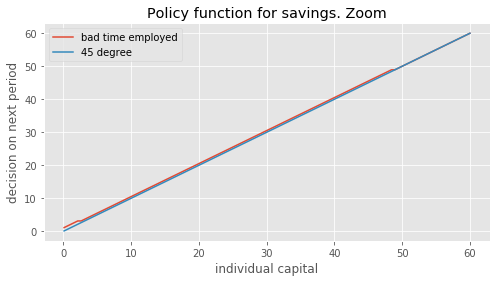

In [7]:
plt.plot(k_grid, k_grid[ar[:,24,0,1]], label='bad time employed') 
plt.plot(k_grid, k_grid, label='45 degree')
plt.legend() 
plt.xlabel('individual capital')
plt.ylabel('decision on next period')
plt.title('Policy function for savings. Zoom')
plt.rcParams["figure.figsize"] = (8,4)
#####################################

(0, 5)

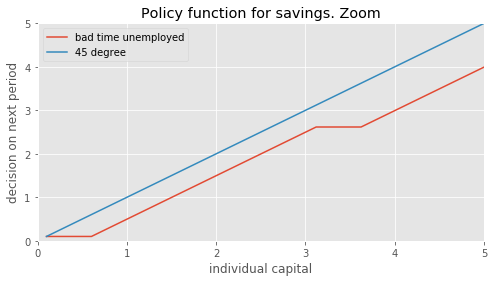

In [8]:
plt.plot(k_grid, k_grid[ar[:,24,1,1]], label='bad time unemployed')
plt.plot(k_grid, k_grid, label='45 degree')
plt.legend() 
plt.xlabel('individual capital')
plt.ylabel('decision on next period')
plt.title('Policy function for savings. Zoom')
plt.rcParams["figure.figsize"] = (8,4)
plt.xlim([0,5]) 
plt.ylim([0,5])
######################################

## Algorithm for periods 51-100 (after policy implementation)

In [29]:
# transtion matrix aggregate state
piZ = [ [7/8, 1/8], 
       [1/8, 7/8] ] # because average duration of both good and bad times is eight quarters

pi_vec = [0.27166667,0.025,0.01125,0.00267593,0.60333333,0.85,0.11375,0.12232407,0.11375,0.00682292,0.425,0.04,0.01125,0.11817708,0.45,0.835]
pize = np.reshape(pi_vec,[4,4], order = 'F')

# Parameters
betta=0.95
delta=0.0025
z=[1.01, 0.99]
alfa=0.36
L=[0.96, 0.9]

# $$$$$$$$$$$$$$$$$$ Starting values for V $$$$$$$$$$$$$$$$$$$$$$$    
##### Starting values for V
def v1g2(k,K):
    return np.log(alfa*z[0]*(K/L[0])**(alfa-1)*k + (1-alfa)*z[0]*(K/L[0])**(alfa)-delta*k)/(1-betta) # c+k' session 2  
def v1b2(k,K):
    return np.log(alfa*z[1]*(K/L[1])**(alfa-1)*k + (1-alfa)*z[1]*(K/L[1])**(alfa)-delta*k)/(1-betta) # c+k' session 2  
def v0g2(k,K):
    return np.log(alfa*z[0]*(K/L[0])**(alfa-1)*k -delta*k)/(1-betta) # c+k' session 2  
def v0b2(k,K):
    return np.log(alfa*z[1]*(K/L[1])**(alfa-1)*k -delta*k)/(1-betta) # c+k' session 2


# $$$$$$$$$$$$$$$$$$ grids $$$$$$$$$$$$$$$$$$$$$$$ 
    
##### Grids 
# Individual capital
k_grid = np.linspace(0.1,60,120)


# Aggregate capital
x=1
i = 0
K_grid=[]
while x==1:
    K_grid.append(round(16+i*0.15, 2))
    i = i+1
    if 16+i*0.15 >= 45:
        x = 0
        
# $$$$$$$$ Evaluation of the VF
        
##### Evaluation of the VF
#initialize variables
V1g2 = [0]*len(k_grid)
V1b2 = [0]*len(k_grid)
V0g2 = [0]*len(k_grid)
V0b2 = [0]*len(k_grid)
V1gt2 = [0]*len(k_grid)
V1bt2 = [0]*len(k_grid)
V0gt2 = [0]*len(k_grid)
V0bt2 = [0]*len(k_grid)

for i in range(len(k_grid)):
    V1g2[i] = [0]*len(K_grid)
    V1b2[i] = [0]*len(K_grid)
    V0g2[i] = [0]*len(K_grid)
    V0b2[i] = [0]*len(K_grid)
    V1gt2[i] = [0]*len(K_grid)
    V1bt2[i] = [0]*len(K_grid)
    V0gt2[i] = [0]*len(K_grid)
    V0bt2[i] = [0]*len(K_grid)     

for i in range(len(k_grid)):
    for j in range(len(K_grid)):
        V1g2[i][j]= v1g2(k_grid[i],K_grid[j])
        V1b2[i][j]= v1b2(k_grid[i],K_grid[j])
        V0g2[i][j]= v0g2(k_grid[i],K_grid[j])
        V0b2[i][j]= v0b2(k_grid[i],K_grid[j])

##### Perceived law of motion  
# initial values 
b0g=0
b1g=1
b0b=0
b1b=1

iter_b = 1
BREAK = 0
while iter_b<15 and BREAK ==0:
    print(iter_b)
    # zi is the index for good shock 
    def H(K,zi):
        return np.exp( (b0g+b1g*np.log(K))*zi+ (b0b+b1b*np.log(K))*(1-zi))
    
    # $$$$$$$$$$$$ Solution of the consumer problem   
    # Consumption for each possible decision   
    # e=0 unemployed =1 employed
    # g=0 good times  =1 bad times
    
    #consumption
    def c(i,I,e,g):
        vec = np.dot(alfa*z[g]*(K_grid[I]/L[g])**(alfa-1),k_grid)+(1-alfa)*z[g]*(K_grid[I]/L[g])**(alfa)*e+(1-delta)*k_grid[i]- k_grid
        for i in range(len(vec)):
            if vec[i]<0:
                vec[i]=0
        return(vec)
    
    
    def column(matrix, i):
        return [row[i] for row in matrix]
    
    iter = 1
    STOP = 0
    while iter < 15 and STOP == 0:
        i=0
        for i in range(len(k_grid)):
            I = 0
            for I in range(len(K_grid)):
                values = abs(K_grid-H(K_grid[I],1))
                Ip= np.argmin(values)
                V0gt2[i][I] = max(np.log(c(i,I,0,0)) + betta*(np.matmul(pize[0],[column(V0g2, Ip), column(V1g2, Ip), column(V0b2,Ip), column(V1b2,Ip)])))
                V1gt2[i][I] = max(np.log(c(i,I,1,0)) + betta*(np.matmul(pize[1],[column(V0g2, Ip), column(V1g2, Ip), column(V0b2,Ip), column(V1b2,Ip)])))
                 
                values = abs(K_grid-H(K_grid[I],0))
                Ip= np.argmin(values)
                V0bt2[i][I] = max(np.log(c(i,I,0,1)) + betta*(np.matmul(pize[2],[column(V0g2, Ip), column(V1g2, Ip), column(V0b2,Ip), column(V1b2,Ip)])))
                V1bt2[i][I] = np.nanmax(np.log(c(i,I,1,1)) + betta*(np.matmul(pize[3],[column(V0g2, Ip), column(V1g2, Ip), column(V0b2,Ip), column(V1b2,Ip)])))
        
        temp=np.array([abs(np.array(V0gt2)-np.array(V0g2)),abs(np.array(V1gt2)-np.array(V1g2)),abs(np.array(V0bt2)-np.array(V0b2)),abs(np.array(V1bt2)-np.array(V1b2))])
        dev = temp.max()        
        
        for i in range(len(k_grid)):
            for j in range(len(K_grid)):
                V0g2[i][j]=V0gt2[i][j]
                V1g2[i][j]=V1gt2[i][j]
                V0b2[i][j]=V0bt2[i][j]
                V1b2[i][j]=V1bt2[i][j]  
        
        if dev<0.1:
            STOP = 1

        iter = iter + 1
      
    #recover policy function
    a2 = [0]*len(k_grid)
    for i in range(len(k_grid)):
        a2[i]=[0]*len(K_grid)
        for I in range(len(K_grid)):
            a2[i][I]=[0]*2
            for x in range(2):
                a2[i][I][x] = [0]*2
                
                
    for i in range(len(k_grid)):
        for I in range(len(K_grid)):
            values = abs(K_grid-H(K_grid[I],1))
            Ip= np.argmin(values)           
            #0g
            a2[i][I][1][0] = np.argmax(np.log(c(i,I,0,0)) + betta*(np.matmul(pize[0],[column(V0g2, Ip), column(V1g2, Ip), column(V0b2,Ip), column(V1b2,Ip)])))
            #1g
            a2[i][I][0][0] = np.argmax(np.log(c(i,I,1,0)) + betta*(np.matmul(pize[1],[column(V0g2, Ip), column(V1g2, Ip), column(V0b2,Ip), column(V1b2,Ip)])))
            
            values = abs(K_grid-H(K_grid[I],0))
            Ip= np.argmin(values)
            #0b
            a2[i][I][1][1] = np.argmax(np.log(c(i,I,0,1)) + betta*(np.matmul(pize[2],[column(V0g2, Ip), column(V1g2, Ip), column(V0b2,Ip), column(V1b2,Ip)])))
            #1b
            a2[i][I][0][1] = np.argmax(np.log(c(i,I,1,1)) + betta*(np.matmul(pize[3],[column(V0g2, Ip), column(V1g2, Ip), column(V0b2,Ip), column(V1b2,Ip)])))
    
    ar2 = np.array(a2)  
    ########## Simulation
    
    
    # A sequence of TFP
    # using the index =0 good ,  =1 bad
    
    if iter_b==1:
        zt = [0]*50  
        
        zt[0]=0            
        for t in range(1,50):
            draw=random.randint(0,100)/100
            zt[t]= int(draw>=piZ[zt[t-1]][0])
               
        # Splitting the sample for good and bad times   
        i_zg = []
        i_zb = []
        
        for t in range(len(zt)):
            if zt[t]==0:
                i_zg.append(t) # index good times 
            else:
                i_zb.append(t) # index bad times           
                
        # initial distribution of assets and employment    
        N_state = [40]*1000
        for i in range(len(N_state)):
            N_state[i] = [0]*2
            for j in range(2):
                N_state[i][j] = [0]*50
        
        for i in range(len(N_state)):
            N_state[i][0][0] = N_state_temp[i][0]
            N_state[i][1][0] = N_state_temp[i][1]
        
        N_state = np.array(N_state)
        
        # Storage of the sequence of aggregate capital    
        K_ind = [0]*50
        K_ind[0]=3
        for t in range(1,50):
            temp_sum = 0
            for n in range(1000):
                # Evolution of assets
                N_state[n][0][t]=a[N_state[n][0][t-1]][K_ind[t-1]][N_state[n][1][t-1]][zt[t-1]]
                # Evolution of the employment status     
                if zt[t-1]==0 and zt[t]==0 and N_state[n][1][t-1]==0: #gg0
                    N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[1][0]/piZ[0][0])    
                if zt[t-1]==0 and zt[t]==1 and N_state[n][1][t-1]==0: #gb0
                    N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[1][2]/piZ[0][1])
                if zt[t-1]==1 and zt[t]==0 and N_state[n][1][t-1]==0: #bg0
                    N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[3][0]/piZ[1][0])
                if zt[t-1]==1 and zt[t]==1 and N_state[n][1][t-1]==0: #bb0
                    N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[3][2]/piZ[1][1])
                if zt[t-1]==0 and zt[t]==0 and N_state[n][1][t-1]==1: #gg1
                    N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[0][0]/piZ[0][0])
                if zt[t-1]==0 and zt[t]==1 and N_state[n][1][t-1]==1: #gb1
                    N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[0][2]/piZ[0][1])
                if zt[t-1]==1 and zt[t]==0 and N_state[n][1][t-1]==1: #bg1
                    N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[2][0]/piZ[1][0])
                if zt[t-1]==1 and zt[t]==1 and N_state[n][1][t-1]==1: #bb1
                    N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[2][2]/piZ[1][1])
                temp_sum = temp_sum + N_state[n][0][t]
            K_ind[t]=np.argmin(abs(k_grid[int(round(temp_sum/1000))]-K_grid))
    
    else:
        for t in range(1,50):
            temp_sum = 0
            for n in range(1000):
                # Evolution of assets
                N_state[n][0][t]=a[N_state[n][0][t-1]][K_ind[t-1]][N_state[n][1][t-1]][zt[t-1]]
                # Storage of the sequence of aggregate capital
                temp_sum = temp_sum + N_state[n][0][t]
            K_ind[t]=np.argmin(abs(k_grid[int(round(temp_sum/1000))]-K_grid))

    #$$$$$$$$$$ Regression model for the evolution of aggregate capital
  
    # regression for good times (burning the first 20 periods of g times)
    Yg = [0]*len(i_zg)
    Xg = [0]*len(i_zg)
    for i in range(len(i_zg)):
        Xg[i] = [0]*2
        
    for i in range(20,len(i_zg)):
        Yg[i] = np.log(K_grid[K_ind[i_zg[i]-1]])
        for j in range(2):
            Xg[i][0] = 1
            Xg[i][1] = np.log(K_grid[K_ind[i_zg[i]-2]])
        #Bg[i]
    
    Bg = np.linalg.lstsq(Xg,Yg)
    b0gp=Bg[0][0]
    b1gp=Bg[0][1]
    
    # regression for bad times (burning the first 20 periods of bad times.
    Yb = [0]*len(i_zb)
    Xb = [0]*len(i_zb)
    for i in range(len(i_zb)):
        Xb[i] = [0]*2
        
    for i in range(20,len(i_zb)):
        Yb[i] = np.log(K_grid[K_ind[i_zb[i]-1]])
        for j in range(2):
            Xb[i][0] = 1
            Xb[i][1] = np.log(K_grid[K_ind[i_zb[i]-2]])
        #Bg[i]
    
    Bb = np.linalg.lstsq(Xb,Yb)
    b0bp=Bb[0][0]
    b1bp=Bb[0][1]

    
    dev_b=max([abs(b0g-b0gp), abs(b1g-b1gp), abs(b0b-b0bp), abs(b1b-b1bp)])
    
    if dev_b<=0.01:
        BREAK = 1
    
    b0g=0.1*b0gp+0.9*b0g
    b1g=0.1*b1gp+0.9*b1g
    b0b=0.1*b0bp+0.9*b0b
    b1b=0.1*b1bp+0.9*b1b
    
    iter_b = iter_b + 1

1


C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:115: RuntimeWarning: divide by zero encountered in log
C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:116: RuntimeWarning: divide by zero encountered in log
C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: RuntimeWarning: divide by zero encountered in log
C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: RuntimeWarning: divide by zero encountered in log
C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:153: RuntimeWarning: divide by zero encountered in log
C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:155: RuntimeWarning: divide by zero encountered in log
C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:160: RuntimeWarning: divide by zero encountered in log
C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: divide by zero encountered in log
C:\Users\adamw\Anaconda3\lib\site-packag

2
3
4
5
6
7
8
9
10
11
12
13
14


In [ ]:
unemp2 = [0]*100
for t in range(100):
    for n in range(1000):   
        unemp2[t] = unemp2[t] + N_state_join[n][1][t]

plt.plot(range(100), unemp2) 

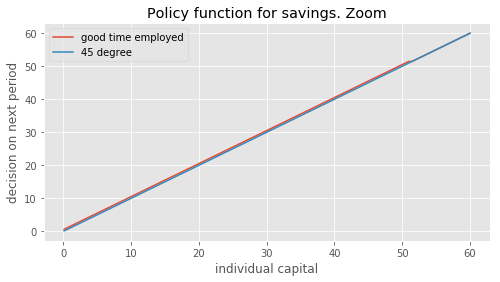

In [30]:
plt.plot(k_grid, k_grid[ar2[:,24,0,0]], label='good time employed')
plt.plot(k_grid, k_grid, label='45 degree')
plt.legend() 
plt.xlabel('individual capital')
plt.ylabel('decision on next period')
plt.title('Policy function for savings. Zoom')
plt.rcParams["figure.figsize"] = (8,4)
######################################

(0, 5)

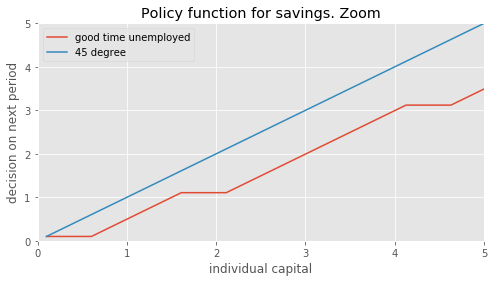

In [31]:
plt.plot(k_grid, k_grid[ar2[:,22,1,0]], label='good time unemployed')
plt.plot(k_grid, k_grid, label='45 degree')
plt.legend() 
plt.xlabel('individual capital')
plt.ylabel('decision on next period')
plt.title('Policy function for savings. Zoom')
plt.rcParams["figure.figsize"] = (8,4)
plt.xlim([0,5]) 
plt.ylim([0,5])
######################################

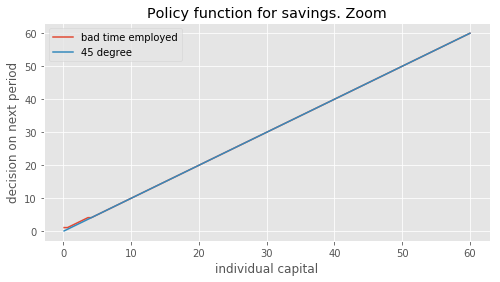

In [32]:
plt.plot(k_grid, k_grid[ar2[:,24,0,1]], label='bad time employed') 
plt.plot(k_grid, k_grid, label='45 degree')
plt.legend() 
plt.xlabel('individual capital')
plt.ylabel('decision on next period')
plt.title('Policy function for savings. Zoom')
plt.rcParams["figure.figsize"] = (8,4)
#####################################

(0, 5)

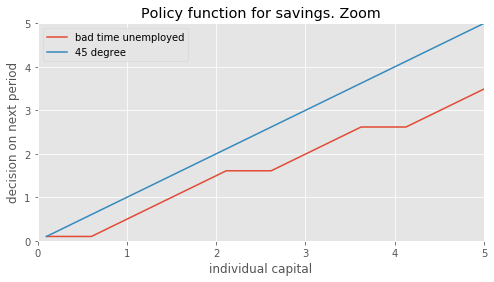

In [33]:
plt.plot(k_grid, k_grid[ar2[:,24,1,1]], label='bad time unemployed')
plt.plot(k_grid, k_grid, label='45 degree')
plt.legend() 
plt.xlabel('individual capital')
plt.ylabel('decision on next period')
plt.title('Policy function for savings. Zoom')
plt.rcParams["figure.figsize"] = (8,4)
plt.xlim([0,5]) 
plt.ylim([0,5])
######################################

### Join two periods into one

In [34]:
N_state_join = [40]*1000
for i in range(len(N_state_join)):
    N_state_join[i] = [0]*2
    for j in range(2):
        N_state_join[i][j] = [0]*100

for t in range(100):
    for n in range(1000):
        if t<50:
            N_state_join[n][0][t] = N_state_old[n][0][t]
            N_state_join[n][1][t] = N_state_old[n][1][t]
        else:
            N_state_join[n][0][t] = N_state[n][0][t-50]
            N_state_join[n][1][t] = N_state[n][1][t-50]

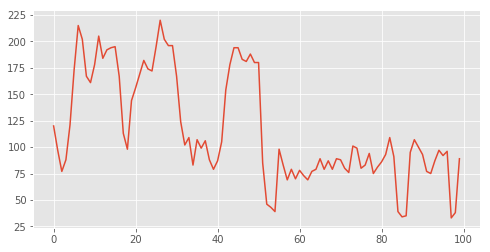

In [35]:
unemp2 = [0]*100
for t in range(100):
    for n in range(1000):   
        unemp2[t] = unemp2[t] + N_state_join[n][1][t]

plt.plot(range(100), unemp2) 

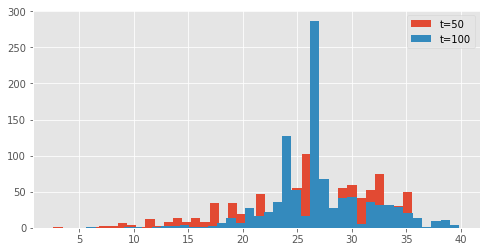

In [39]:
N_state_join = np.array(N_state_join)

plt.hist(k_grid[N_state_join[:,0,51]], 40, label='t=50')
plt.hist(k_grid[N_state_join[:,0,90]], 40, label='t=100')
plt.legend()

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 1000.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.]),
 array([19.73445378, 19.75945378, 19.78445378, 19.80945378, 19.83445378,
        19.85945378, 19.88445378, 19.90945378, 19.93445378, 19.95945378,
        19.98445378, 20.00945378, 20.03445378, 20.05945378, 20.08445378,
        20.10945378, 20.13445378, 20.15945378, 20.18445378, 20.20945378,
        20.23445378, 20.25945378, 20.28445378, 20.30945378, 20.33445378,
        20.35945378, 20.38445378, 20.40945378, 20.43445378, 20.45945378,
        20.48445378, 20.50945378, 20.53445378, 20.55945378, 20.58445378,
        20.60945378, 20.63445378, 20.65945378, 20.68445378, 20.70945378,
        20.73445378]),
 <a list of 40 Patch objects>)

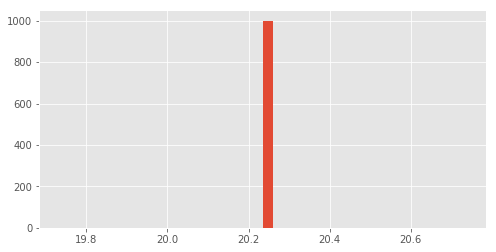

In [41]:
plt.hist(k_grid[N_state_join[:,0,0]], 40, label='t=1')